In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.linalg import svd
from time import time

In [ ]:
# read data from csv
clean_ling_data = pd.read_csv('../data/ling_data.csv')
clean_lingloc = pd.read_csv('../data/clean_lingloc.csv')

In [ ]:
# Question
Q = ['Q050', 'Q051', 'Q052', 'Q053', 'Q054',
       'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063',
       'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072',
       'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081',
       'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090',
       'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099',
       'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109',
       'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121']

# Use get_dummies to encode the categorical data into binary vectors
encoded_data = pd.get_dummies(clean_ling_data, columns=Q, prefix=Q)

In [ ]:
# Drop columns that end with '_0'
encoded_data = encoded_data.loc[:, ~encoded_data.columns.str.endswith('_0')]
print(encoded_data.shape) # 474 - 6 = 468

(47471, 474)


In [ ]:
# Select one-hot encoded columns as features
X = encoded_data.drop(['ID', 'CITY', 'STATE', 'ZIP', 'lat', 'long'], axis=1)
# Select 'lat' column as label
Y = encoded_data['lat']
# Select 'long' column as label
Y1 = encoded_data['long']
# X = StandardScaler().fit_transform(X)  # Standardize the data

# If all of the variables are on a common scale (e.g. binary), it may not make sense to rescale them, as the scaling will be for a variable which is almost all-zeros than for one which is evenly split between 0s and 1s.
# If 0 is meaningful (e.g. data is nonnegative, or binary), it may not make sense to mean-center.
# So here we are going to use SVD PCA instead of scikit-learn’s PCA, but we can compare them.

## Sklearn PCA

In [ ]:
# PCA using sklearn
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X)

In [ ]:
X_pca

array([[-0.91415293, -0.3845774 ,  0.60368065, ...,  0.24834361,
        -0.1183833 ,  0.01545313],
       [ 1.09540314, -1.29086275, -0.18226591, ...,  0.26890995,
        -0.07011276, -0.01511676],
       [ 0.92737293, -1.29984066, -0.40148   , ..., -0.21893279,
         0.04796165,  0.09061203],
       ...,
       [-0.39846819, -0.19697534, -1.06256577, ..., -0.24972341,
         0.04021645,  0.06547781],
       [-0.38772271, -0.20184851, -1.29294508, ...,  0.01967248,
        -0.07107472, -0.00722065],
       [ 0.58890427, -0.71727882, -0.83409154, ..., -0.12738094,
        -0.00980203,  0.54431474]])

In [ ]:
# Create a DataFrame for scores
ling_scores = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
ling_scores['Latitude'] = Y
ling_scores['Longitude'] = Y1

In [ ]:
# Set up the figure and a grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: PCA of Ling Data (Latitude)
sns.scatterplot(data=ling_scores, x='PC1', y='PC2', alpha=0.5, hue='Latitude', size='Latitude', palette='viridis_r', ax=axes[0])
axes[0].set_title('PCA of Ling Data (Latitude)')

# Second subplot: PCA of Ling Data (Latitude) using SVD
sns.scatterplot(data=ling_scores, x='PC1', y='PC2', alpha=0.5, hue='Longitude', size='Longitude', palette='viridis_r', ax=axes[1])
axes[1].set_title('PCA of Ling Data (Longitude)')

# Display the plots
plt.show()

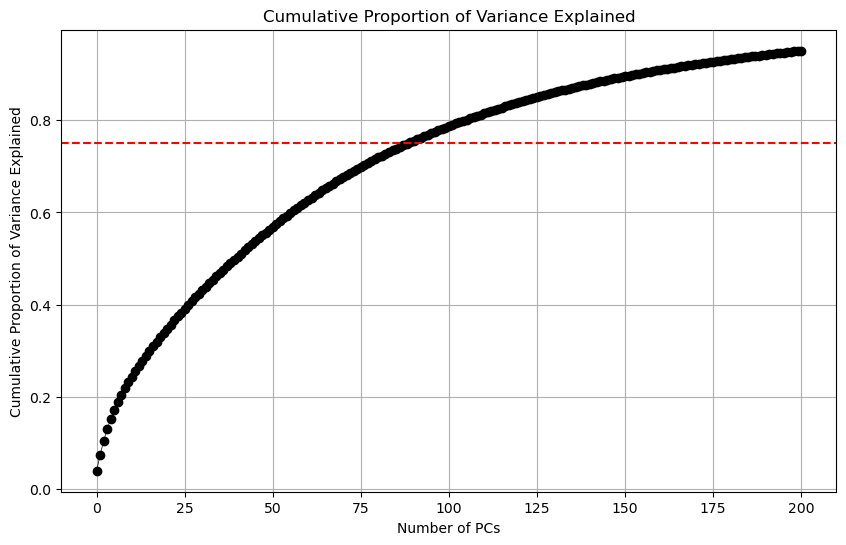

In [ ]:
# Cumulative variance explained
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(cum_var_explained, marker='o', color='black', linewidth=0.5)
plt.axhline(0.75, color='red', linestyle='--')
plt.title('Cumulative Proportion of Variance Explained')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.grid()
plt.show()

In [ ]:
# How many PC's would you need to explain 75% of the variance?
n_pcs = np.argmax(cum_var_explained >= 0.75) + 1
print(f'Number of PCs to explain 75% of variance: {n_pcs}')

Number of PCs to explain 75% of variance: 90


## SVD PCA

Classifying these questions:

### 1. **Language Usage**
   - Q50, Q51, Q52, Q53: Use of specific phrases, modal verbs, and linguistic constructs.
   - Q54, Q55, Q56, Q57: Use of "anymore" in different contexts.
   - Q58, Q59, Q60, Q61, Q62, Q63, Q64, Q65, Q66, Q67, Q97, Q98: Terminology for specific activities, objects, or creatures.

### 2. **Cultural and Regional Expressions**
   - Q68, Q69, Q70, Q71: Nicknames for grandparents, reflecting cultural and familial relationships.
   - Q72, Q73, Q74, Q75, Q76, Q77, Q78, Q79, Q80, Q81: Terms for everyday objects, food, or phenomena.
   - Q82, Q83, Q84, Q85, Q86, Q87, Q88, Q89, Q90: Specific expressions or items with potential regional variations.

### 3. **Social and Behavioral Norms**
   - Q91, Q92, Q93, Q94, Q95, Q96, Q99, Q100, Q101, Q120, Q121: Phrases or terms related to social interactions, behaviors, or preferences.
   - Q102, Q103, Q104, Q105, Q106, Q107, Q108, Q109, Q110, Q111, Q118, Q119: Terminology related to social practices, education, or local customs.

### 4. **Phonological and Pronunciation Variations**
   - Q112, Q113, Q114, Q115, Q116, Q117: Focus on pronunciation of specific words or sounds, indicating dialectal differences.

### Interpretation:
- **Language Usage**: Questions in this category are about how language is used in different regions or social groups. They might reveal dialects or colloquialisms.
- **Cultural and Regional Expressions**: These questions tap into cultural practices and regional differences in everyday language and expressions.
- **Social and Behavioral Norms**: Reflecting social etiquette, common practices, or local customs.
- **Phonological and Pronunciation Variations**: Indicative of dialectal differences in pronunciation.



In [ ]:
# SVD for PCA
U, s, Vt = svd(X, full_matrices=False)
ling_scores_svd = pd.DataFrame(U @ np.diag(s), columns=[f'PC{i+1}' for i in range(len(s))])
ling_scores_svd['Latitude'] = Y
ling_scores_svd['Longitude'] = Y1

In [ ]:
ling_scores_svd

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC461,PC462,PC463,PC464,PC465,PC466,PC467,PC468,Latitude,Longitude
0,-4.936069,-0.963308,0.630990,-0.212268,1.619620,-2.192742,-0.513318,0.234421,0.650673,0.051041,...,-0.016985,0.007958,0.012889,0.022149,-0.000982,0.002874,0.000159,0.001374,44.0,-116.0
1,-5.866418,1.225269,1.073834,0.254240,-0.235723,0.765273,-1.100182,0.100438,-0.146800,-0.441613,...,-0.015196,0.010974,0.020097,0.019413,-0.005330,0.000704,-0.004192,0.001407,42.0,-73.0
2,-5.643398,1.042671,1.098600,-0.345907,1.427630,-0.672576,-0.411865,-0.184622,-1.841479,-0.985009,...,-0.013070,0.013570,0.016310,0.022577,-0.002496,-0.001102,-0.001417,0.003743,44.0,-73.0
3,-5.453224,2.027778,-0.326467,-0.212062,0.525607,-1.212946,-1.435734,-1.002533,0.248087,-0.963694,...,-0.015310,0.011708,0.016622,0.021928,-0.002325,-0.000827,-0.000696,0.000905,41.0,-75.0
4,-5.346542,1.308374,0.298160,1.445796,1.100766,0.126754,-1.206770,-0.001010,-0.446367,0.703658,...,-0.015235,0.012547,0.014788,0.021859,-0.004422,-0.000581,-0.000584,0.003192,42.0,-71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47466,-6.320593,-0.325568,-0.900428,-1.206944,-0.567218,-0.068320,-0.770060,1.209751,0.544332,0.789567,...,0.000721,-0.000582,0.000277,-0.001034,-0.000923,-0.000431,0.000299,0.000697,34.0,-78.0
47467,-5.352995,-0.823775,0.064166,1.082338,-1.604653,0.563878,1.296026,0.720676,0.591163,0.773151,...,0.002106,-0.002009,-0.000136,0.000605,-0.003401,-0.002100,-0.002597,-0.000229,39.0,-85.0
47468,-5.731872,-0.321634,-0.011049,-1.381610,-1.365064,0.510159,-0.819808,-0.978322,0.205073,0.551357,...,-0.000375,-0.001320,-0.000459,0.002317,0.001654,0.001972,-0.000607,0.000212,44.0,-84.0
47469,-5.991298,-0.277599,-0.094494,-1.397267,-1.441404,0.464928,-0.385776,-0.627623,0.537678,0.357199,...,-0.001083,-0.000464,-0.000166,0.001217,0.000061,0.000864,0.001653,-0.000698,48.0,-122.0


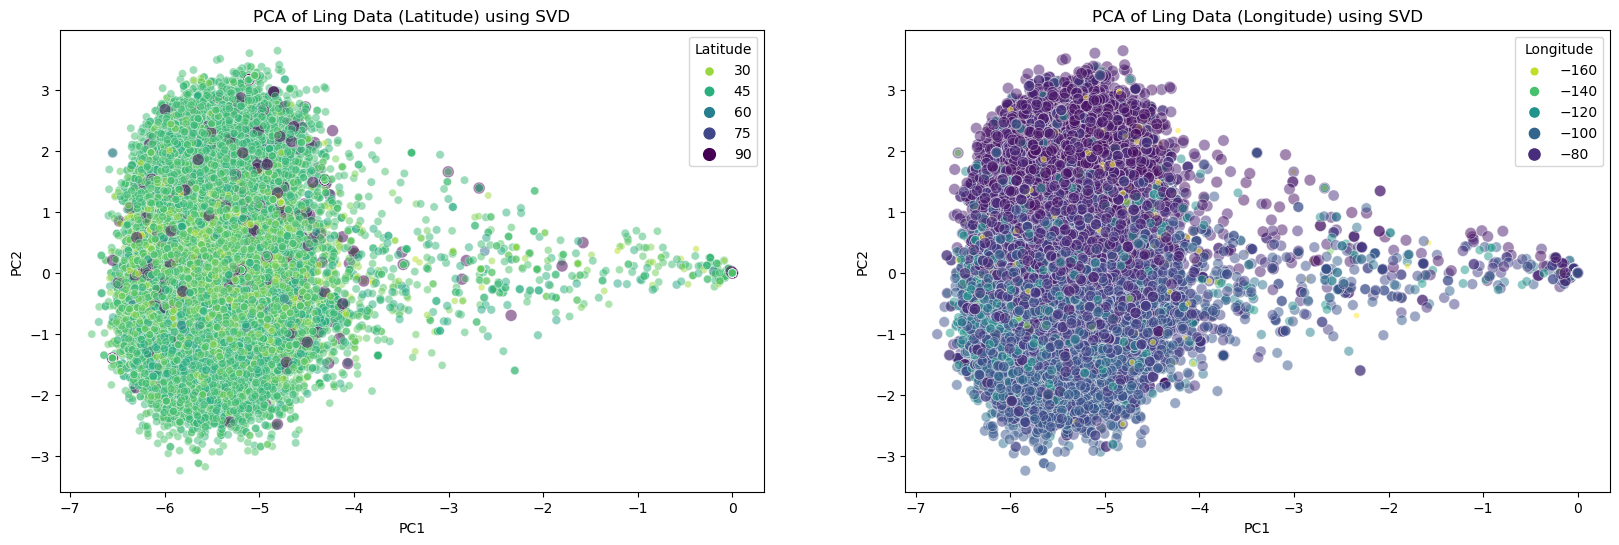

In [ ]:
# Set up the figure and a grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: PCA of Ling Data (Latitude)
sns.scatterplot(data=ling_scores_svd, x='PC1', y='PC2', alpha=0.5, hue='Latitude', size='Latitude', palette='viridis_r', ax=axes[0])
axes[0].set_title('PCA of Ling Data (Latitude) using SVD')

# Second subplot: PCA of Ling Data (Latitude) using SVD
sns.scatterplot(data=ling_scores_svd, x='PC1', y='PC2', alpha=0.5, hue='Longitude', size='Longitude', palette='viridis_r', ax=axes[1])
axes[1].set_title('PCA of Ling Data (Longitude) using SVD')

# Display the plots
plt.show()

In [ ]:
prop_var = np.square(s) / sum(np.square(s))
pd.DataFrame(
    {"PC": 1 + np.arange(0, prop_var.shape[0]),
     "variability_explained": prop_var.round(2),
     "cumulative_variability_explained": prop_var.cumsum().round(2)
     }).head(47)

,PC,variability_explained,cumulative_variability_explained
0,1,0.46,0.46
1,2,0.02,0.48
2,3,0.02,0.50
3,4,0.02,0.52
4,5,0.01,0.53
5,6,0.01,0.54
6,7,0.01,0.55
7,8,0.01,0.56
8,9,0.01,0.57
9,10,0.01,0.57


In [ ]:
# How many PC's would you need to explain 75% of the variance?
n_pcs = np.argmax(prop_var.cumsum().round(2) >= 0.75) + 1
print(f'Number of PCs to explain 75% of variance: {n_pcs}')

Number of PCs to explain 75% of variance: 47


In [ ]:
# The following table shows the 10 variables with the highest loading on PC1. PC1 mostly seems to be capturing language usage (negative loading).
# put the loadings for PC1 in a data frame
loadings1 = pd.DataFrame(
    {"Answer": X.columns,
     "pc1_loading": Vt[0]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings1.reindex(loadings1["pc1_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

,Answer,pc1_loading
90,Q063_1,-0.174651
121,Q067_1,-0.168387
309,Q093_2,-0.165023
19,Q054_2,-0.164727
233,Q081_1,-0.162541
22,Q055_2,-0.159695
16,Q053_2,-0.158453
432,Q115_1,-0.155188
411,Q109_1,-0.153773
377,Q104_1,-0.147421


In [ ]:
# The following table shows the 10 variables with the highest loading on PC2. They mostly seem to be Cultural and Regional Expressions.
# put the loadings for PC2 in a data frame
loadings2 = pd.DataFrame(
    {"Answer": X.columns,
     "pc2_loading": Vt[1]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings2.reindex(loadings2["pc2_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

,Answer,pc2_loading
164,Q073_1,0.270678
169,Q073_6,-0.239001
383,Q105_1,0.202121
224,Q080_1,0.187348
231,Q080_8,-0.175736
384,Q105_2,-0.168368
25,Q056_2,0.166153
393,Q106_1,-0.158355
24,Q056_1,-0.155415
374,Q103_3,-0.148320


There is clearly some kind of "dialects information" being captured by these two PCs, but the fact that the vast majority of the variability in the data is contained within the first PC, and that each PC involves variables from across several different binary variables (e.g., PC2 contains Cultural and Regional Expressions and Language Usage) means that they will not be particularly useful for creating summary variables that indicate geographical information.

Regardless, let's take a look at these principal components in terms of how the answers seem to be distributed in PC space.

First, we need to create a version of the dataset that has been transformed into PC space. This involves multiplying the original data matrix with the PC loading matrix.

In [ ]:
# create the PCA-transformed dataset

# multiply the original data and the PCA loadings

pca_scaled_x = X@Vt
# make the data frame pretty and easier to work with by
# changing the column names to PC1, PC2, etc
pca_scaled_x.columns = ["PC" + str(1 + col) for col in pca_scaled_x.columns]

# look at the object
pca_scaled_x.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC459,PC460,PC461,PC462,PC463,PC464,PC465,PC466,PC467,PC468
0,-0.174653,-0.333799,-0.320423,-0.252181,-0.074824,0.666675,0.204943,-0.029198,-0.150507,0.039248,...,-0.041624,0.341514,0.358454,-0.000473,-0.291072,-0.385841,0.335326,0.497324,-0.039656,-0.086205
1,0.219001,0.004788,0.286255,-0.057046,-0.363499,-0.764420,0.358467,0.686371,-0.530661,-0.567192,...,0.018621,0.400208,0.167870,0.514309,-0.163577,-0.060008,0.149376,0.792041,0.136641,-0.109759
2,-0.032438,0.055124,0.316317,0.067909,-0.985025,-0.371458,0.311309,0.244457,-0.687418,-0.755777,...,0.403979,0.578053,-0.051447,-0.057829,-0.278633,0.075402,0.657714,0.826676,-0.294828,0.300052
3,-0.284900,-0.200558,0.572985,0.022076,-0.425282,-0.467206,-0.193438,-0.181916,-0.390730,-0.030808,...,-0.345346,-0.320557,0.375827,0.064955,-0.324130,-0.266649,0.822399,0.810443,-0.208591,-0.316920
4,-0.267183,0.404641,0.416189,0.149797,-0.212184,-0.405924,-0.048081,0.144009,-0.362334,-0.255305,...,0.154041,0.310093,0.302076,-0.088040,0.235429,-0.529452,0.798285,0.575771,0.024911,-0.167645


In [ ]:
# previously we know # of PC's to explain 75% of the variance is 47
# Selecting only the first 47 columns
pcadata = pca_scaled_x.iloc[:, :47]
pcadata['Latitude'] = Y
pcadata['Longitude'] = Y1
pcadata['STATE'] = clean_ling_data['STATE']
pcadata['CITY'] = clean_ling_data['CITY']
print(pcadata.shape)

(47471, 51)


/var/folders/2_/8561wcj10390hzz8d8ydnk980000gn/T/ipykernel_21908/1497092923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcadata['Latitude'] = Y
/var/folders/2_/8561wcj10390hzz8d8ydnk980000gn/T/ipykernel_21908/1497092923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcadata['Longitude'] = Y1
/var/folders/2_/8561wcj10390hzz8d8ydnk980000gn/T/ipykernel_21908/1497092923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
# save as csv
# pcadata.to_csv('../data/pcadata.csv', index=False)

In [ ]:
# Timing comparisons
npcs = 5

# Timing PCA with sklearn
start_time = time()
pca_out = PCA(n_components=npcs).fit(X)
time_sklearn = time() - start_time

# Timing SVD
start_time = time()
U, s, Vt = svd(X, full_matrices=False)
time_svd = time() - start_time

print(f"Time taken by sklearn PCA: {time_sklearn:.4f} seconds")
print(f"Time taken by SVD: {time_svd:.4f} seconds")

# Variance explained
var_ex1 = (s[:npcs]**2) / np.sum(s**2)
var_ex2 = pca.explained_variance_ratio_[:npcs]

print("Variance explained using sklearn PCA (first 5 PCs):", var_ex2)
print("Variance explained using SVD (first 5 PCs):", var_ex1)

Time taken by sklearn PCA: 0.7552 seconds
Time taken by SVD: 0.5093 seconds
Variance explained using sklearn PCA (first 5 PCs): [0.0403046  0.03457256 0.0304268  0.02586354 0.02076817]
Variance explained using SVD (first 5 PCs): [0.46071288 0.02223763 0.01890393 0.01548402 0.01151885]
